<a href="https://colab.research.google.com/github/Anirudh2465/Seizure-Detection-ML/blob/main/MFC_SEIZURE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydmd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.5/169.5 kB 2.2 MB/s eta 0:00:00


In [ ]:
import os
import math
import imblearn
import logging
import warnings
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score , accuracy_score , precision_score, recall_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE
import pydmd as DMD
%matplotlib inline




from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/Epileptic Seizure Recognition.csv')

In [ ]:
data_1 = data.copy()

In [ ]:
data_1.drop(['Unnamed','y'],axis=1,inplace=True)

In [ ]:
data['y'].value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

In [ ]:
data_2 = data.drop(["Unnamed"],axis=1).copy()

In [ ]:
data_2["Output"]= data_2.y == 0

In [ ]:
data_2["Output"] = data_2["Output"].astype(int)

In [ ]:
data_2.y.value_counts()

y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64

In [ ]:
data_2['y'] = data_2['y'].replace([2,3,4,5],0)

In [ ]:
data_2.y.value_counts() #we can see there is a mojor class imbalance problem in our dataset

y
0    9200
1    2300
Name: count, dtype: int64

In [ ]:
X  = data_2.drop(['Output','y'], axis=1)
y = data_2['y']

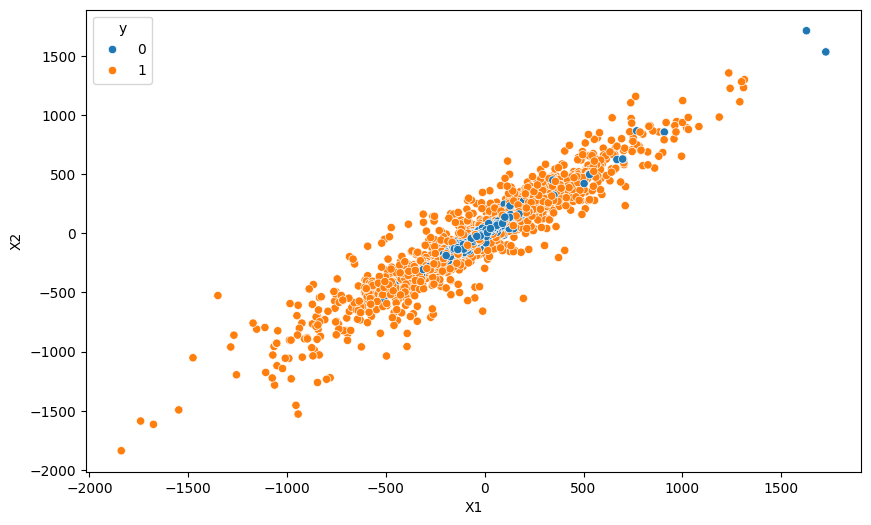

In [ ]:
plt.figure(figsize=(10,6),dpi=100)
sns.despine(left=True)
sns.scatterplot(x='X1', y='X2', hue = 'y', data=data_2)
plt.show()
#we can see the clear class imbalance problem present here

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
valscaled = scaler.fit_transform(X)

smote = SMOTE(k_neighbors=1)

# Fit the SMOTE transformer to the data
smote.fit(valscaled,y)

# Resample the data
val, labels = smote.fit_resample(X,y)

In [ ]:
print(len(val))

18400


In [ ]:
print(type(val))
print(type(labels))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
Features = val.to_numpy()
Labels = labels.to_numpy()

In [ ]:
print(type(Features))
print(len(Features))
print(len(Labels))
print(type(Labels))

<class 'numpy.ndarray'>
18400
18400
<class 'numpy.ndarray'>


In [ ]:
D={}
for i in Labels:
  if i not in D:
    D[i] = 1
  else:
    D[i]= D[i] + 1
print(D)

{0: 9200, 1: 9200}


In [ ]:
from pydmd import DMD

In [ ]:
X = X.to_numpy()

In [ ]:
print(len(X))
print(len(y))

11500
11500


In [ ]:
import numpy as np
from pydmd import DMD
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Perform DMD on the training data
dmd = DMD(svd_rank=0)
dmd.fit(Features)
Features_dmd = dmd.modes.real

X_train, X_test, y_train, y_test = train_test_split(Features_dmd, Labels, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from scipy.stats import skew, kurtosis
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

Model 3 trained
Accuracy of model 3: 0.9677536231884057
Precision: 0.9681333299071504
Recall: 0.9677536231884057
F1 Score: 0.9677501560449987


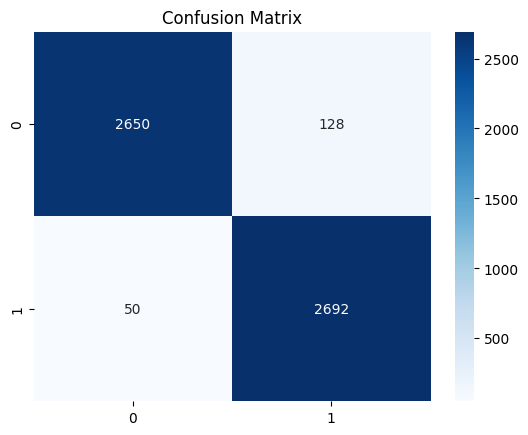

In [ ]:
model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
print("Model 3 trained")

pred3 = model3.predict(X_test)
accuracy = np.mean(pred3 == y_test)
print(f'Accuracy of model 3: {accuracy}')


# Calculate precision, recall, and F1 score
precision = precision_score(y_test, pred3, average='weighted')
recall = recall_score(y_test, pred3, average='weighted')
f1 = f1_score(y_test, pred3, average='weighted')

# Print the scores
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Generate confusion matrix
matrix = confusion_matrix(y_test, pred3)

# Create a heatmap
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

Model 1 trained
Accuracy of model 1: 0.9739130434782609
Precision: 0.9740716791788125
Recall: 0.9739130434782609
F1 Score: 0.9739124441757565


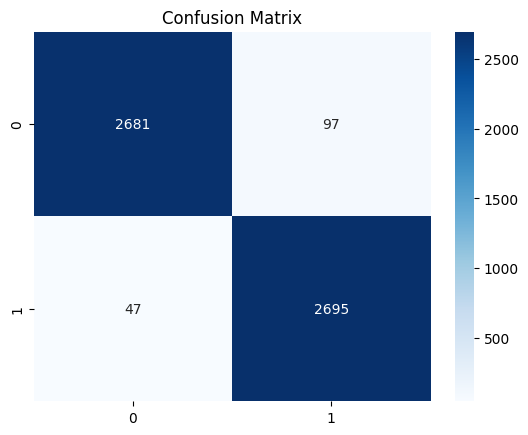

In [ ]:

model1 = HistGradientBoostingClassifier()
model1.fit(X_train,y_train)
print("Model 1 trained")

pred1 = model1.predict(X_test)
accuracy = np.mean(pred1 == y_test)
print(f'Accuracy of model 1: {accuracy}')


# Calculate precision, recall, and F1 score
precision = precision_score(y_test, pred1, average='weighted')
recall = recall_score(y_test, pred1, average='weighted')
f1 = f1_score(y_test, pred1, average='weighted')

# Print the scores
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Generate confusion matrix
matrix = confusion_matrix(y_test, pred1)

# Create a heatmap
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

Model 2 trained
Accuracy of model 2: 0.9289855072463769
Precision: 0.9313099207159219
Recall: 0.9289855072463769
F1 Score: 0.9288711846728152


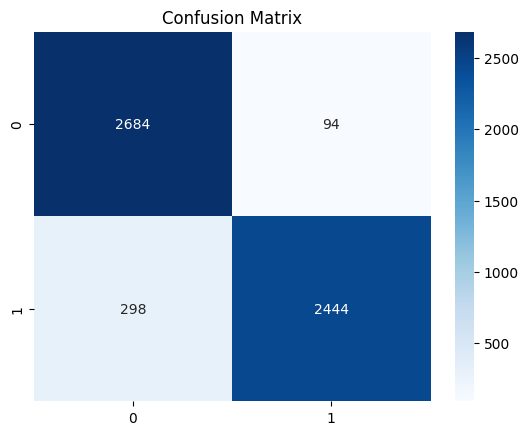

In [ ]:
model2 = svm.SVC()
model2.fit(X_train,y_train)
print("Model 2 trained")

pred2 = model2.predict(X_test)
accuracy = np.mean(pred2 == y_test)
print(f'Accuracy of model 2: {accuracy}')


# Calculate precision, recall, and F1 score
precision = precision_score(y_test, pred2, average='weighted')
recall = recall_score(y_test, pred2, average='weighted')
f1 = f1_score(y_test, pred2, average='weighted')

# Print the scores
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Generate confusion matrix
matrix = confusion_matrix(y_test, pred2)

# Create a heatmap
sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.show()

Model 4 trained
Accuracy of Decision Tree model: 0.9338768115942029
Precision: 0.9341588618610512
Recall: 0.9338768115942029
F1 Score: 0.9338718701467249


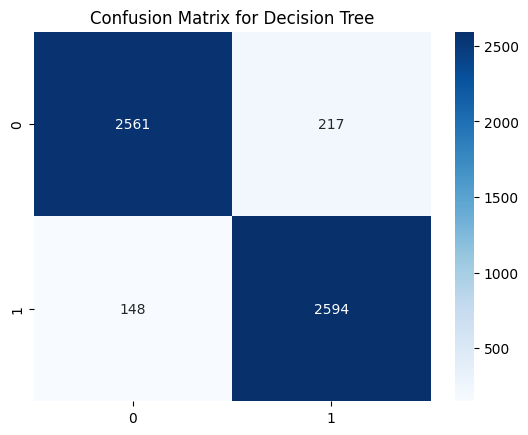

In [ ]:

model4 = DecisionTreeClassifier()
model4.fit(X_train, y_train)
print("Model 4 trained")

pred4 = model4.predict(X_test)
accuracy = np.mean(pred4 == y_test)
print(f'Accuracy of Decision Tree model: {accuracy}')

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, pred4, average='weighted')
recall = recall_score(y_test, pred4, average='weighted')
f1 = f1_score(y_test, pred4, average='weighted')

# Print the scores
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Generate confusion matrix
matrix4 = confusion_matrix(y_test, pred4)

# Create a heatmap
sns.heatmap(matrix4, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for Decision Tree')
plt.show()